# SciPy
* collection of mathematical algorithms and convenience functions built on NumPy
* docs (SciPy docs of course) says that with SciPy Python can rival MATLAB, Octave, ...
*  \+ can use Python in niches, parallel programming, web, ...

In [73]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Special functions
* functions of mathematical physics
* inputs and outputs are mostly arrays

In [88]:
from scipy import special as sc

In [97]:
# complete list
help(sc)

Help on package scipy.special in scipy:

NAME
    scipy.special

DESCRIPTION
    Special functions (:mod:`scipy.special`)
    
    .. currentmodule:: scipy.special
    
    Nearly all of the functions below are universal functions and follow
    broadcasting and automatic array-looping rules.
    
    .. seealso::
    
       `scipy.special.cython_special` -- Typed Cython versions of special functions
    
    
    Error handling
    
    Errors are handled by returning NaNs or other appropriate values.
    Some of the special function routines can emit warnings or raise
    exceptions when an error occurs. By default this is disabled; to
    query and control the current error handling state the following
    functions are provided.
    
    .. autosummary::
       :toctree: generated/
    
       geterr                 -- Get the current way of handling special-function errors.
       seterr                 -- Set how special-function errors are handled.
       errstate              

## example: gamma and beta function

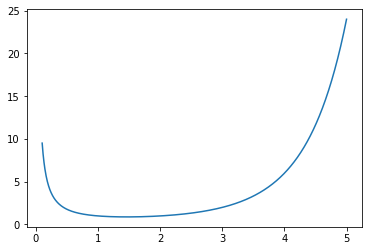

In [91]:
x = np.linspace(0.1,5,1000)
y = sc.gamma(x)
plt.plot(x,y);  # for MATLAB users + in jupyter it does not produce output

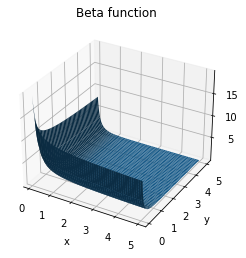

In [93]:
X, Y = np.meshgrid(x, x)
Z = sc.beta(X, Y)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,)
ax.set_title('Beta function')
ax.set_xlabel('x')
ax.set_ylabel('y');

# Integration

In [95]:
from scipy import integrate

In [96]:
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       quad_vec      -- General purpose integration of vector-valued functions
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose N-D integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on i

## Integration
### Quad

In [104]:
import math
integrate.quad(np.sin, 0, math.pi/2)

(0.9999999999999999, 1.1102230246251564e-14)

the output is a tuple
* first element holds the estimated value
* second element holds an upper bound error

In [112]:
# good use of lambda expressions
# infinite boundary is also allowed
integrate.quad(lambda x: np.exp(-x) , 0, np.inf)

(1.0000000000000002, 5.842606742906004e-11)

In [113]:
# ...Warning
integrate.quad(lambda x: x , 0, np.inf)

<ipython-input-113-d10ea2803127>:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrate.quad(lambda x: x , 0, np.inf)


(0.4999999961769933, 5.7336234760563265e-06)

In [140]:
# ...Warning
integrate.quad(lambda x: 1/x , 0, np.inf)

<ipython-input-140-0ff022367bac>:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrate.quad(lambda x: 1/x , 0, np.inf)


(48.720960971461565, 16.30167063049395)

### dblquad, nquad

In [157]:
func1 = lambda x,z: x*x*z
integrate.dblquad(func1, 0, 1, 0, 5)  # boundaries for x are 0, 5

(20.833333333333336, 4.615884440936191e-13)

In [158]:
#non-constant boundaries
func2 = lambda x,z: x*z
integrate.dblquad(func2, 0, 1, lambda x: 1+x, lambda x: 5-x)

(3.9999999999999996, 6.661306739153578e-14)

In [159]:
# nquad
integrate.nquad(func1, [[0,5], [0, 1]])   # reverse order than dblquad

(20.833333333333336, 4.615884440936191e-13)

In [160]:
integrate.nquad(func2, [lambda x: [1+x, 5-x], [0,1]])

(3.9999999999999996, 6.661306739153578e-14)

## Integrating using samples
* equally spaced samples
* number of sumples is $2^k + 1$
* can obtain high-precision estimates of the integral using Romberg integration

In [183]:
integrate.romberg(np.sin, 0, math.pi/2, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7f5879a8b1f0> from [0, 1.5707963267948966]

 Steps  StepSize   Results
     1  1.570796  0.785398 
     2  0.785398  0.948059  1.002280 
     4  0.392699  0.987116  1.000135  0.999992 
     8  0.196350  0.996785  1.000008  1.000000  1.000000 
    16  0.098175  0.999197  1.000001  1.000000  1.000000  1.000000 

The final result is 0.9999999999980171 after 17 function evaluations.


0.9999999999980171

* arbitrary spacing
* trapz: approximates function as a straight line between 2 adjacent points
* simps: approx. f. between 3 adjacent points as a parabola

In [179]:
aux = [math.pi/2 * i/1000 for i in range(1000)]
x = np.sin(aux)
integrate.trapz(x)  # ...default dx = 1.0

635.6196420847323

In [180]:
aux = [math.pi/2 * i/1000 for i in range(1000)]
x = np.sin(aux)
integrate.trapz(x, aux)  # ...default dx = 1.0

0.9984289990253841

In [181]:
integrate.simps(x, aux)

0.9984292041575853

In [182]:
1.0 - integrate.simps(x, aux) < 1.0 - integrate.trapz(x, aux)

True

## Solving ODEs
example: Bratu's problem:

$y'' + e^y = 0$

$y(0) = 0, y(1) = 0$

need to transform into a first order ODR system:

$ y_0' = y_1$

$ y_1' = -e^{y_0}$

In [184]:
func = lambda x,y: np.vstack((y[1], -np.exp(y[0])))

define the mesh and boundary conditions:

In [200]:
mesh = np.linspace(0, 1, 100)
bc = lambda x,y: np.array([x[0], y[0]])

prepare arrays for solutions:

In [192]:
y = np.zeros((2, mesh.size))   # length of y in func is 2 

run the solver:

In [205]:
res = integrate.solve_bvp(func, bc, mesh, y)

plot